In [3]:
%pip install pandas matplotlib scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


  Using cached pandas-2.3.0-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached scikit_learn-1.7.0-cp313-cp313-win_amd64.whl.metadata (14 kB)
  Using cached numpy-2.3.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.5-cp313-cp313-win_amd64.whl.metadata (109 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.16.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using c

In [5]:
df = pd.read_csv(r'C:\Users\Admin\python ML\data\raw\housing.csv')
df .head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df["total_rooms"].describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

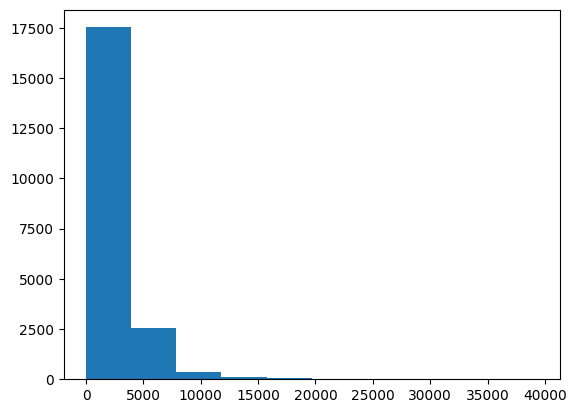

In [12]:
plt.hist(df["total_rooms"]);


In [13]:
low, high = df["total_rooms"].quantile([0.1, 0.9])
print(f"Low: {low}, High: {high}")

Low: 941.0, High: 4651.500000000011


In [15]:
mask_rooms = (df["total_rooms"] .between(low, high))
df = df[mask_rooms]
df["total_rooms"].describe()

count    16516.000000
mean      2294.230019
std        896.212634
min        941.000000
25%       1578.000000
50%       2126.500000
75%       2876.000000
max       4651.000000
Name: total_rooms, dtype: float64

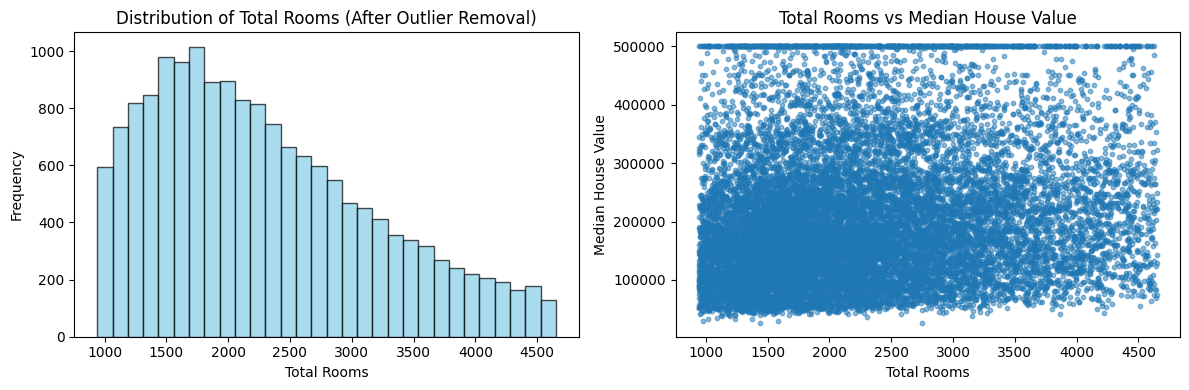

Dataset shape after cleaning: (16516, 10)
Removed 0 outlier rows


In [16]:
# Visualize the cleaned data
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df["total_rooms"], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Rooms (After Outlier Removal)')
plt.xlabel('Total Rooms')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.scatter(df["total_rooms"], df["median_house_value"], alpha=0.5, s=10)
plt.title('Total Rooms vs Median House Value')
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value')

plt.tight_layout()
plt.show()

print(f"Dataset shape after cleaning: {df.shape}")
print(f"Removed {mask_rooms.sum() - len(df)} outlier rows")

## SPLIT DATA 

In [25]:
features = ["total_rooms"]
target = "median_house_value"
X_train = df[features]
y_train = df[target]

## Build Model

In [29]:
# Explore the dataset structure
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nMissing values:")
print(df.isnull().sum())

print("\nBasic statistics:")
df.describe()

Dataset Info:
Shape: (16516, 13)
Columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

Missing values:
longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

Basic statistics:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16516.000000,16516.000000,16516.000000,16516.000000,16516.000000,16516.000000,16516.000000,16516.000000,16516.000000,16516.000000,16516.000000,16516.000000
mean,-119.586040,35.631887,29.626483,2294.230019,477.482381,1283.243945,447.752725,3.849742,207338.724207,5.395671,0.211513,2.907505
std,1.993242,2.142670,12.129468,896.212634,208.367521,614.282192,193.297585,1.842069,115144.229078,2.429929,0.053053,0.768328
min,-124.350000,32.550000,1.000000,941.000000,100.000000,27.000000,11.000000,0.549500,26600.000000,1.654440,0.093696,0.692308
25%,-121.810000,33.930000,20.000000,1578.000000,322.000000,848.000000,305.000000,2.580600,120400.000000,4.473346,0.175932,2.430961
50%,-118.490000,34.250000,30.000000,2126.500000,434.000000,1164.000000,410.000000,3.525000,181000.000000,5.216715,0.203075,2.810032
75%,-118.030000,37.710000,37.000000,2876.000000,589.000000,1585.000000,555.000000,4.694625,264525.000000,5.996016,0.238351,3.264846
max,-114.490000,41.950000,52.000000,4651.000000,2293.000000,7174.000000,2156.000000,15.000100,500001.000000,141.909091,0.692801,18.821818


In [30]:
# Feature Engineering
# Create new features that might be useful for prediction

# Rooms per household
df['rooms_per_household'] = df['total_rooms'] / df['households']

# Bedrooms per room ratio
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

# Population per household
df['population_per_household'] = df['population'] / df['households']

print("New features created:")
print("- rooms_per_household")
print("- bedrooms_per_room") 
print("- population_per_household")

# Display some statistics of the new features
print("\nNew feature statistics:")
new_features = ['rooms_per_household', 'bedrooms_per_room', 'population_per_household']
df[new_features].describe()

New features created:
- rooms_per_household
- bedrooms_per_room
- population_per_household

New feature statistics:


,rooms_per_household,bedrooms_per_room,population_per_household
count,16516.000000,16516.000000,16516.000000
mean,5.395671,0.211513,2.907505
std,2.429929,0.053053,0.768328
min,1.654440,0.093696,0.692308
25%,4.473346,0.175932,2.430961
50%,5.216715,0.203075,2.810032
75%,5.996016,0.238351,3.264846
max,141.909091,0.692801,18.821818


In [31]:
# Prepare data for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Handle missing values in total_bedrooms
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

# Select features for modeling
feature_columns = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income',
    'rooms_per_household', 'bedrooms_per_room', 'population_per_household'
]

X = df[feature_columns]
y = df['median_house_value']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Features used: {len(feature_columns)}")

Training set size: (13212, 11)
Test set size: (3304, 11)
Features used: 11
